# CenterTrack - Tracking Objects as Points
Simultaneous object detection and tracking using center points:
<img src="https://github.com/xingyizhou/CenterTrack/raw/master/readme/fig2.png">

**Original code :** [CenterTrack](https://github.com/xingyizhou/CenterTrack) by [Xingyi Zhou](https://github.com/xingyizhou)

**[Tracking Objects as Points](http://arxiv.org/abs/2004.01177)**,

Xingyi Zhou, Vladlen Koltun, Philipp Krähenbühl,

ECCV 2020

**Citation**
```
@article{zhou2020tracking,
  title={Tracking Objects as Points},
  author={Zhou, Xingyi and Koltun, Vladlen and Kr{\"a}henb{\"u}hl, Philipp},
  journal={ECCV},
  year={2020}
}
```

## 0. Environment Setup & Drive mount

In [9]:
!nvidia-smi
#GPU가 잘 인식되는지 확인하는 과정입니다.

Wed Jul 19 07:06:22 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [10]:
!wget https://www.python.org/ftp/python/3.6.13/Python-3.6.13.tgz
!tar xvfz Python-3.6.13.tgz
%cd Python-3.6.13
!./configure
!make
!sudo make install
!sudo apt install libffi-dev
#Python 버전을 낮추는 과정으로 4분 정도 소요됩니다.

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Compiling '/usr/local/lib/python3.6/ctypes/test/test_incomplete.py'...
Compiling '/usr/local/lib/python3.6/ctypes/test/test_init.py'...
Compiling '/usr/local/lib/python3.6/ctypes/test/test_internals.py'...
Compiling '/usr/local/lib/python3.6/ctypes/test/test_keeprefs.py'...
Compiling '/usr/local/lib/python3.6/ctypes/test/test_libc.py'...
Compiling '/usr/local/lib/python3.6/ctypes/test/test_loading.py'...
Compiling '/usr/local/lib/python3.6/ctypes/test/test_macholib.py'...
Compiling '/usr/local/lib/python3.6/ctypes/test/test_memfunctions.py'...
Compiling '/usr/local/lib/python3.6/ctypes/test/test_numbers.py'...
Compiling '/usr/local/lib/python3.6/ctypes/test/test_objects.py'...
Compiling '/usr/local/lib/python3.6/ctypes/test/test_parameters.py'...
Compiling '/usr/local/lib/python3.6/ctypes/test/test_pep3118.py'...
Compiling '/usr/local/lib/python3.6/ctypes/test/test_pickling.py'...
Compiling '/usr/local/lib/python3.6/ctypes/test/test_pointers.py'...
C

In [11]:
!python --version
#Python 3.6.13을 출력해야 합니다.

Python 3.6.13


In [12]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
!pip install --upgrade setuptools

In [ ]:
!pip install --upgrade pip

    100% |████████████████████████████████| 1.7MB 16.1MB/s 
  Found existing installation: pip 18.1
    Uninstalling pip-18.1:
      Successfully uninstalled pip-18.1


In [ ]:
!pip install cython

In [ ]:
cd ../gdrive/MyDrive/Samsung_AI_expert/CenterTrack/

/content/gdrive/.shortcut-targets-by-id/19l1mgKhAMa6B0g4SNLY2vE5DjcudjK1i/Samsung_AI_expert/CenterTrack


In [ ]:
!pip install -r requirements.txt
#3분 정도 소요됩니다.
#실행 후 런타임을 다시 시작해주셔야 합니다. (RESTART RUNTIME 버튼을 눌러주세요)

     |████████████████████████████████| 25.0 MB 1.3 MB/s             
     |████████████████████████████████| 3.4 MB 54.5 MB/s            
     |████████████████████████████████| 3.4 MB 64.3 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 11.5 MB 62.5 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 25.9 MB 86.6 MB/s            
     |████████████████████████████████| 312 kB 70.3 MB/s            
     |████████████████████████████████| 677 kB 70.7 MB/s            
     |████████████████████████████████| 133 kB 72.0 MB/s            
     |████████████████████████████████| 7.1 MB 34.4 MB/s            
     |████████████████████████████████| 734.6 MB 23 kB/s             
     |████████████████████████████████| 10.2 MB 54.0 MB/s            
     |████████████████████████████████| 14.8 MB 47.2 MB/s            
     |████████████████████████████████| 9.5 MB 64.6 MB/s            
     |█████████

In [ ]:
#런타임 재시작 후에 경로가 초기화되어서 실행해주셔야 합니다

In [4]:
cd gdrive/MyDrive/

/content/gdrive/MyDrive


In [5]:
!git clone https://github.com/CharlesShang/DCNv2/

Cloning into 'DCNv2'...
remote: Enumerating objects: 214, done.
remote: Counting objects: 100% (77/77), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 214 (delta 64), reused 49 (delta 49), pack-reused 137
Receiving objects: 100% (214/214), 1.40 MiB | 8.82 MiB/s, done.
Resolving deltas: 100% (133/133), done.


In [6]:
cd DCNv2

/content/gdrive/MyDrive/DCNv2


In [7]:
!chmod 777 make.sh

In [8]:
!./make.sh
#2분 정도 소요됩니다.
#마지막에 Finished processing dependencies for DCNv2==0.1라고 출력되어야 합니다.

Traceback (most recent call last):
  File "setup.py", line 6, in <module>
    import torch
ModuleNotFoundError: No module named 'torch'


### Overall Structure

* CenterNet에 기반을 둔 Tracking 모델

CenterNet : Object detection시에 물체의 center point를 찾는 모델

offset : heatmap에서 keypoint들의 위치를 다시 input 이미지에 mapping할때 생기는 오류를 조절하기 위한 벡터

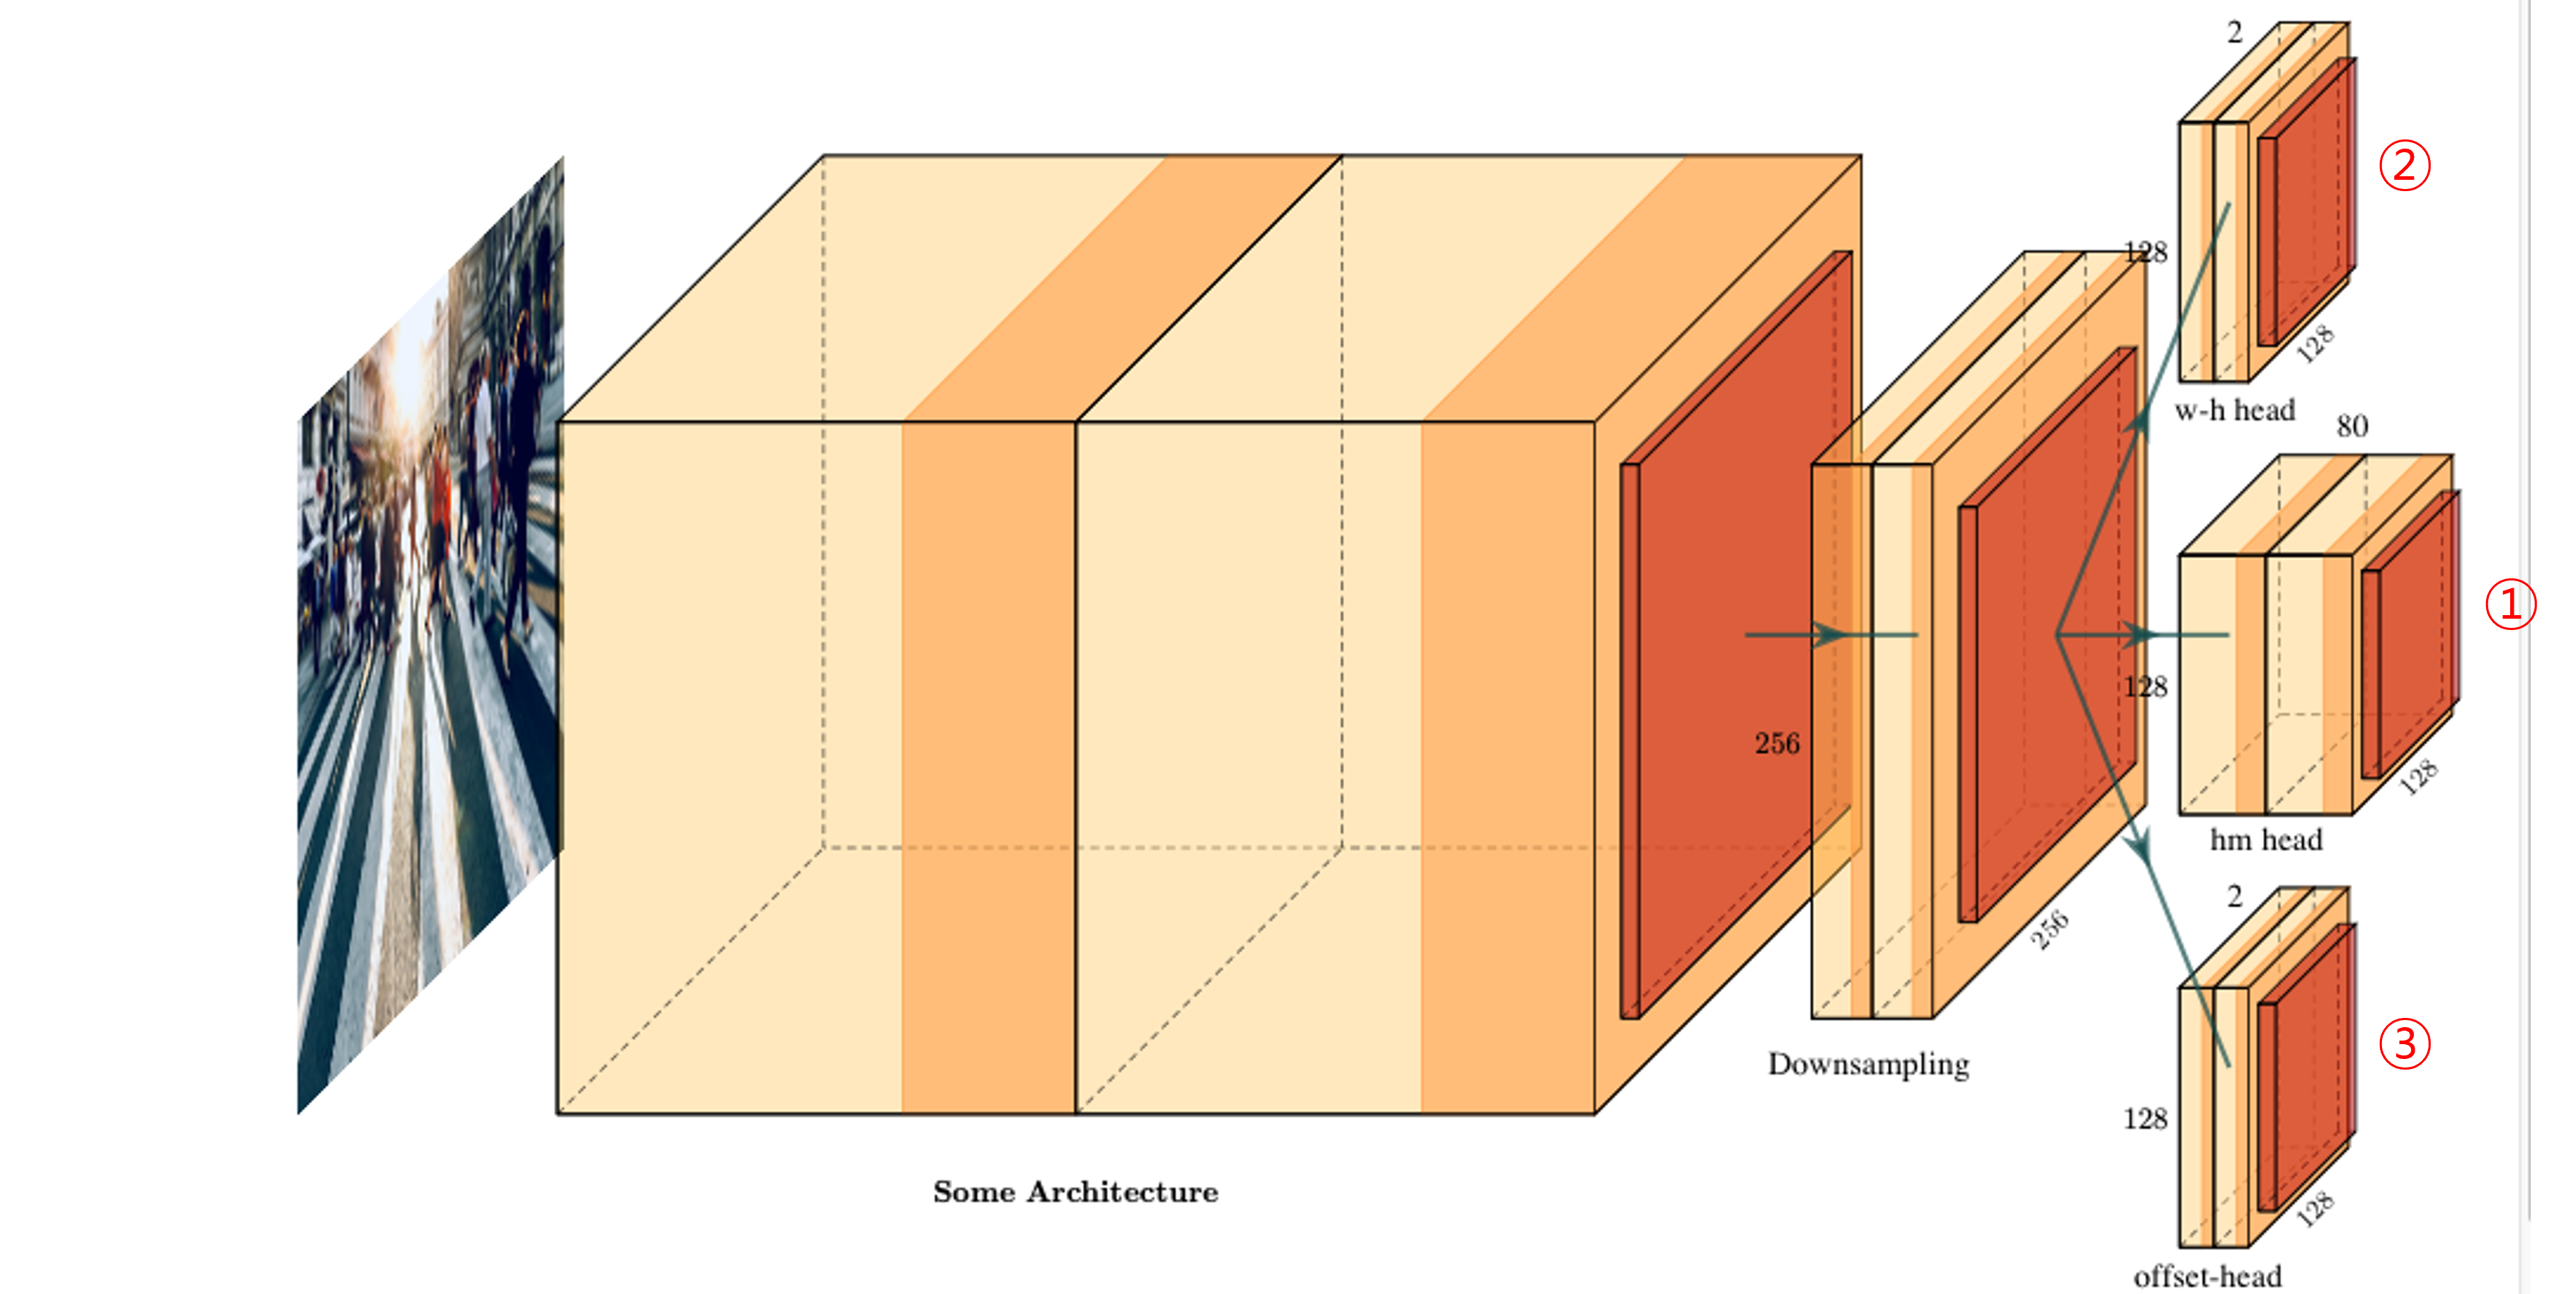

* CenterTrack

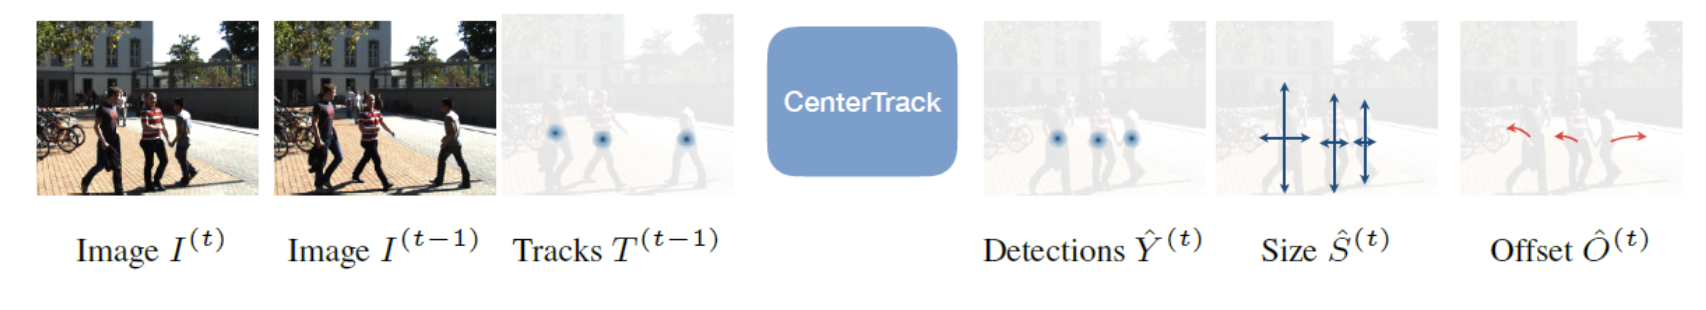

Input : current frame, previous frame, Tracking된 물체 center로부터 추출된 heatmap

Output : current frame에서 detected된 center heatmap, bounding box size map, offset map

*offset : 두 이미지 사이의 feature motion

* Loss function

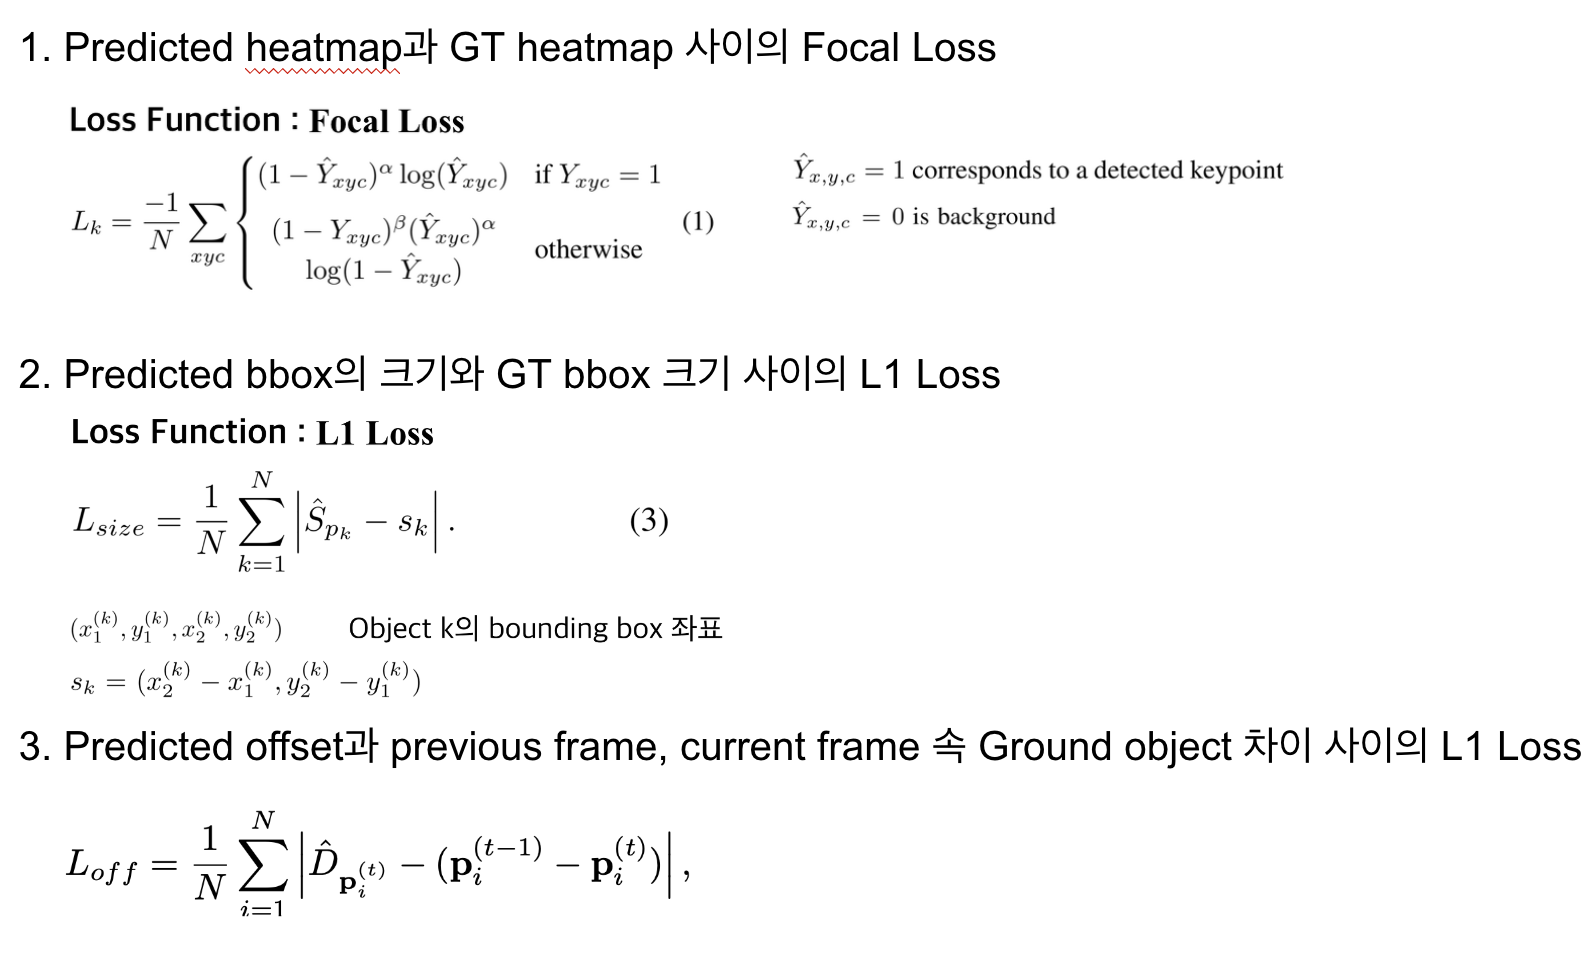

* 3d object detction

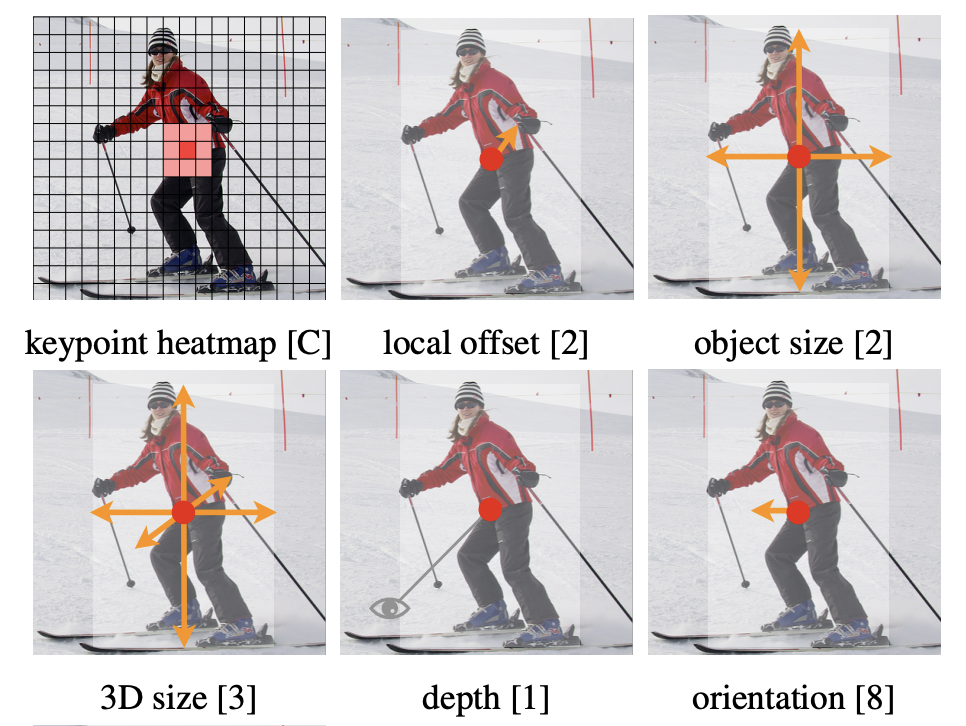

4. Predicted center point depth와 GT 사이의 L1 Loss
5. Preidcted dim (w,h,d)과 GT dim 사이의 L1 Loss
6. Predicted rotation과 GT rotation 사이의 Rotation Loss

### 실습 내용:

* Dataloader 정의 (input, output)

* Train code

* Test code

* Visualization

#### Dataset

nuscenes Dataset
- public large-scale dataset for autonomous driving

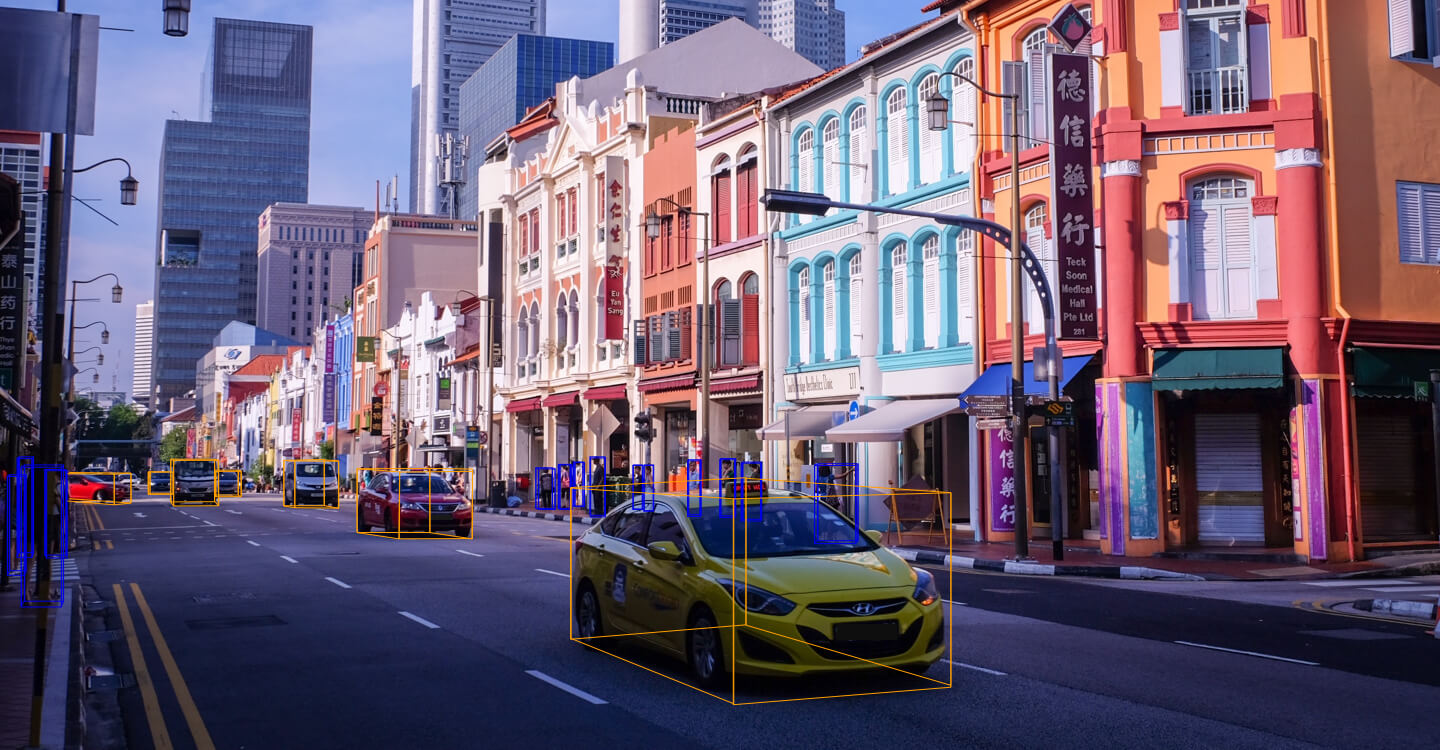

## 1) 데이터로더 정의

In [ ]:
cd ../Samsung_AI_expert/CenterTrack/src

/content/gdrive/.shortcut-targets-by-id/19l1mgKhAMa6B0g4SNLY2vE5DjcudjK1i/Samsung_AI_expert/CenterTrack/src


Dataset loader 시각화용 코드로 실행 안 하셔도 됩니다.

In [ ]:
from dataset.generic_dataset import GenericDataset
from utils.ddd_utils import compute_box_3d, project_to_image

class nuScenes(GenericDataset):
  default_resolution = [448, 800]
  num_categories = 10
  class_name = ['car', 'truck', 'bus', 'trailer','construction_vehicle', 'pedestrian', 'motorcycle', 'bicycle','traffic_cone', 'barrier']
  cat_ids = {i + 1: i + 1 for i in range(num_categories)}
  focal_length = 1200
  max_objs = 128
  _tracking_ignored_class = ['construction_vehicle', 'traffic_cone', 'barrier']
  _vehicles = ['car', 'truck', 'bus', 'trailer', 'construction_vehicle']
  _cycles = ['motorcycle', 'bicycle']
  _pedestrians = ['pedestrian']
  attribute_to_id = {'': 0, 'cycle.with_rider' : 1, 'cycle.without_rider' : 2,'pedestrian.moving': 3, 'pedestrian.standing': 4,'pedestrian.sitting_lying_down': 5,
    'vehicle.moving': 6, 'vehicle.parked': 7,'vehicle.stopped': 8}
  id_to_attribute = {v: k for k, v in attribute_to_id.items()}

  def __init__(self, opt, split):
    split_names = {'train': 'train', 'val': 'val'}
    split_name = split_names[split]
    data_dir = os.path.join(opt.data_dir, 'nuscenes')
    img_dir = os.path.join(
      data_dir, 'v1.0-mini' if split_name  == 'mini' else 'v1.0-trainval')
    print('Dataset version', opt.dataset_version)
    if opt.dataset_version == 'test':
      ann_path = os.path.join(data_dir, 'annotations', 'test.json')
      img_dir = os.path.join(data_dir, 'v1.0-test')
    else:
      ann_path = os.path.join(data_dir,
        'annotations', '{}{}.json').format(opt.dataset_version, split_name)

    self.images = None
    super(nuScenes, self).__init__(opt, split, ann_path, img_dir)

    self.alpha_in_degree = False
    self.num_samples = len(self.images)

    print('Loaded {} {} samples'.format(split, self.num_samples))


  def __len__(self):
    return self.num_samples


  def _to_float(self, x):
    return float("{:.2f}".format(x))


  def convert_coco_format(self, all_bboxes):
    detections = []
    for image_id in all_bboxes:
      if type(all_bboxes[image_id]) != type({}):
        for j in range(len(all_bboxes[image_id])):
          item = all_bboxes[image_id][j]
          category_id = citem['class']
          bbox = item['bbox']
          bbox[2] -= bbox[0]
          bbox[3] -= bbox[1]
          bbox_out  = list(map(self._to_float, bbox[0:4]))
          detection = {
              "image_id": int(image_id),
              "category_id": int(category_id),
              "bbox": bbox_out,
              "score": float("{:.2f}".format(item['score']))
          }
          detections.append(detection)
    return detections


  def convert_eval_format(self, results):
    from nuscenes.utils.data_classes import Box
    ret = {'meta': {'use_camera': True, 'use_lidar': False, 'use_radar': False, 'use_map': False, 'use_external': False}, 'results': {}}
    print('Converting nuscenes format...')
    for image_id in self.images:
      if not (image_id in results):
        continue
      image_info = self.coco.loadImgs(ids=[image_id])[0]
      sample_results = []
      for item in results[image_id]:
        class_name = self.class_name[int(item['class'] - 1)]
        score = float(item['score'])
        size = item['size']
        tracking_id = item['tracking_id'] if 'tracking_id' in item else 1
        rotation = item['rotation']

        result = {
          'size': size,
          'rotation': rotation,
          'detection_score': score,
          'tracking_name': class_name,
          'tracking_id': tracking_id}

    return sample_results

## 2) One epoch Training 코드

Training을 위한 main.py 속 모듈 시각화용 코드이므로 실행 안 하셔도 됩니다.

In [ ]:
class Trainer(object):
  def __init__(
    self, opt, model, optimizer=None):
    self.opt = opt
    self.optimizer = optimizer
    self.loss_stats, self.loss = self._get_losses(opt)
    self.model_with_loss = ModleWithLoss(model, self.loss)

  def run_epoch(self, phase, epoch, data_loader):

    model_with_loss = self.model_with_loss

    if phase == 'train':
      model_with_loss.train()

    opt = self.opt
    results = {}
    data_time, batch_time = AverageMeter(), AverageMeter()
    avg_loss_stats = {l: AverageMeter() for l in self.loss_stats if l == 'tot' or opt.weights[l] > 0}
    num_iters = len(data_loader) if opt.num_iters < 0 else opt.num_iters

    for iter_id, batch in enumerate(data_loader):
      output, loss, loss_stats = model_with_loss(batch)
      loss = loss.mean()
      self.optimizer.zero_grad()
      loss.backward()
      self.optimizer.step()

    ret = {k: v.avg for k, v in avg_loss_stats.items()}

    return ret, results

Training을 위한 main.py 속 모듈 시각화용 코드이므로 실행 안 하셔도 됩니다.

In [ ]:
class ModleWithLoss(torch.nn.Module):
  def __init__(self, model, loss):
    super(ModleWithLoss, self).__init__()
    self.model = model
    self.loss = GenericLoss

  def forward(self, batch):
    pre_img = batch['pre_img'] if 'pre_img' in batch else None
    pre_hm = batch['pre_hm'] if 'pre_hm' in batch else None
    outputs = self.model(batch['image'], pre_img, pre_hm)
    loss, loss_stats = self.loss(outputs, batch)
    return outputs[-1], loss, loss_stats


class GenericLoss(torch.nn.Module):
  def __init__(self, opt):
    super(GenericLoss, self).__init__()
    self.crit = FocalLoss(opt=opt)
    self.crit_reg = L1Loss()
    self.crit_rot = BinRotLoss()
    self.opt = opt

  def forward(self, outputs, batch):
    opt = self.opt
    losses = {head: 0 for head in opt.heads}

    for s in range(opt.num_stacks):
      output = outputs[s]
      output = self._sigmoid_output(output)

      #알맞은 함수를 이용해서 loss를 구해주세요
      losses['hm'] +=          (output['hm'], batch['hm'], batch['mask'], batch['cat']) / opt.num_stacks

      regression_heads = ['reg', 'wh', 'dep', 'dim', 'amodel_offset']

      for head in regression_heads:
        #알맞은 함수를 이용해서 loss를 구해주세요
        losses[head] +=          (output[head], batch[head + '_mask'], batch[head]) / opt.num_stacks

      #알맞은 함수를 이용해서 loss를 구해주세요
      losses['rot'] +=           (output['rot'], batch['rot_mask'], batch['ind'], batch['rotbin'],batch['rotres']) / opt.num_stacks

    losses['tot'] = 0
    for head in opt.heads:
      losses['tot'] += opt.weights[head] * losses[head]

return losses['tot'], losses

hm : heatmap

reg : bbox의 중심

wh : width & height

dep : point의 depth

dim : 3차원 bbox의 크기 (w,h,d)

rot : orientation

amodel_offset : offset

Training을 위한 main.py 속 모듈 시각화용 코드이므로 실행 안 하셔도 됩니다.

In [ ]:
def main(opt):
    torch.manual_seed(317)
    torch.backends.cudnn.benchmark = True
    Dataset = get_dataset('nuscenes')
    opt = opts().update_dataset_info_and_set_heads(opt, Dataset)
    print(opt)

    os.environ['CUDA_VISIBLE_DEVICES'] = '0'
    opt.device = torch.device('cuda')

    print('Creating model...')
    model = create_model("dla_34", opt.heads, -1, opt=opt)
    optimizer = torch.optim.Adam(model.parameters(), 1.25e-4)
    start_epoch = 0

    model, optimizer, start_epoch = load_model(model, opt.load_model, opt, optimizer)

    trainer = Trainer(opt, model, optimizer)
    trainer.set_device(opt.gpus, opt.chunk_sizes, opt.device)

    print('Setting up validation data...')
    val_loader = torch.utils.data.DataLoader(Dataset(opt, 'val'), batch_size=1, shuffle=False, num_workers=1, pin_memory=True)

    print('Setting up train data...')
    train_loader = torch.utils.data.DataLoader(Dataset(opt, 'train'), batch_size=opt.batch_size, shuffle=True, num_workers=opt.num_workers, pin_memory=True, drop_last=True)

    print('Starting training...')
    for epoch in range(start_epoch + 1, opt.num_epochs + 1):
        log_dict_train, _ = trainer.train(epoch, train_loader)
        print('epoch: {} |'.format(epoch))
        for k, v in log_dict_train.items():
            print('train_{}'.format(k), v, epoch)
            print.write('{} {:8f} | '.format(k, v))
            with torch.no_grad():
                log_dict_val, preds = trainer.val(epoch, val_loader)
                if opt.eval_val:
                    val_loader.dataset.run_eval(preds, opt.save_dir)
            for k, v in log_dict_val.items():
                print('val_{}'.format(k), v, epoch)
                print('{} {:8f} | '.format(k, v))


위의 main.py 코드 실행하여 training 시작

In [ ]:
!python main.py tracking,ddd --exp_id nuScenes_3Dtracking --dataset nuscenes --pre_hm --load_model /content/gdrive/MyDrive/Samsung_AI_expert/CenterTrack/models/nuScenes_3Ddetection_e140.pth --shift 0.01 --scale 0.05 --lost_disturb 0.4 --fp_disturb 0.1 --hm_disturb 0.05 --batch_size 2 --gpus 0 --lr 2.5e-4 --save_point 60

None
Running tracking
Using tracking threshold for out threshold! 0.3
Fix size testing.
training chunk_sizes: [2]
input h w: 448 800
heads {'hm': 10, 'reg': 2, 'wh': 2, 'tracking': 2, 'dep': 1, 'rot': 8, 'dim': 3, 'amodel_offset': 2}
weights {'hm': 1, 'reg': 1, 'wh': 0.1, 'tracking': 1, 'dep': 1, 'rot': 1, 'dim': 1, 'amodel_offset': 1}
head conv {'hm': [256], 'reg': [256], 'wh': [256], 'tracking': [256], 'dep': [256], 'rot': [256], 'dim': [256], 'amodel_offset': [256]}
Namespace(K=100, add_05=False, amodel_offset_weight=1, arch='dla_34', aug_rot=0, backbone='dla34', batch_size=2, chunk_sizes=[2], custom_dataset_ann_path='', custom_dataset_img_path='', data_dir='/content/gdrive/.shortcut-targets-by-id/19l1mgKhAMa6B0g4SNLY2vE5DjcudjK1i/Samsung_AI_expert/CenterTrack/src/lib/../../data', dataset='nuscenes', dataset_version='', debug=0, debug_dir='/content/gdrive/.shortcut-targets-by-id/19l1mgKhAMa6B0g4SNLY2vE5DjcudjK1i/Samsung_AI_expert/CenterTrack/src/lib/../../exp/tracking,ddd/nuScenes_3

## 3) Test 코드

Testing을 위한 test.py 속 모듈 시각화용 코드이므로 실행 안 하셔도 됩니다.

In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import _init_paths
import os
import json
import cv2
import numpy as np
import time

import torch
import copy

from opts import opts
from logger import Logger
from utils.utils import AverageMeter
from dataset.dataset_factory import dataset_factory
from detector import Detector

import sys
sys.path.append('/usr/local/lib/python3.6/site-packages/')
from progress.bar import Bar

def test(opt):
  os.environ['CUDA_VISIBLE_DEVICES'] = '0'

  Dataset = dataset_factory['nuscenes']
  opt = opts().update_dataset_info_and_set_heads(opt, Dataset)
  print(opt)
  Logger(opt)

  split = 'val' if not opt.trainval else 'test'
  dataset = Dataset(opt, split)

  detector = Detector(opt)

  results = {}
  num_iters = len(dataset)
  bar = Bar('{}'.format(opt.exp_id), max=num_iters)
  time_stats = ['tot', 'load', 'pre', 'net', 'dec', 'post', 'merge']
  avg_time_stats = {t: AverageMeter() for t in time_stats}
  for ind in range(num_iters):
    img_id = dataset.images[ind]
    img_info = dataset.coco.loadImgs(ids=[img_id])[0]
    img_path = os.path.join(dataset.img_dir, img_info['file_name'])
    input_meta = {}
    if 'calib' in img_info:
      input_meta['calib'] = img_info['calib']
    if (opt.tracking and ('frame_id' in img_info) and img_info['frame_id'] == 1):
      detector.reset_tracking()
      input_meta['pre_dets'] = load_results[img_id]

    ret = detector.run(img_path, input_meta)
    results[img_id] = ret['results']

    Bar.suffix = '[{0}/{1}]|Tot: {total:} |ETA: {eta:} '.format(ind, num_iters, total=bar.elapsed_td, eta=bar.eta_td)
    for t in avg_time_stats:
      avg_time_stats[t].update(ret[t])
      Bar.suffix = Bar.suffix + '|{} {:.3f} '.format(t, avg_time_stats[t].avg)
    bar.next()
  bar.finish()

위 test 코드로 test 시작

In [ ]:
!python test.py tracking,ddd --exp_id nuScenes_3Dtracking --load_model /content/gdrive/MyDrive/Samsung_AI_expert/CenterTrack/models/nuScenes_3Dtracking.pth --dataset nuscenes --track_thresh 0.1 --pre_hm
#6분-10분 정도 소요됩니다.

Running tracking
Using tracking threshold for out threshold! 0.1
Fix size testing.
training chunk_sizes: [64]
input h w: 448 800
heads {'hm': 10, 'reg': 2, 'wh': 2, 'tracking': 2, 'dep': 1, 'rot': 8, 'dim': 3, 'amodel_offset': 2}
weights {'hm': 1, 'reg': 1, 'wh': 0.1, 'tracking': 1, 'dep': 1, 'rot': 1, 'dim': 1, 'amodel_offset': 1}
head conv {'hm': [256], 'reg': [256], 'wh': [256], 'tracking': [256], 'dep': [256], 'rot': [256], 'dim': [256], 'amodel_offset': [256]}
Namespace(K=100, add_05=False, amodel_offset_weight=1, arch='dla_34', aug_rot=0, backbone='dla34', batch_size=64, chunk_sizes=[64], custom_dataset_ann_path='', custom_dataset_img_path='', data_dir='/content/gdrive/.shortcut-targets-by-id/19l1mgKhAMa6B0g4SNLY2vE5DjcudjK1i/Samsung_AI_expert/CenterTrack/src/lib/../../data', dataset='nuscenes', dataset_version='', debug=0, debug_dir='/content/gdrive/.shortcut-targets-by-id/19l1mgKhAMa6B0g4SNLY2vE5DjcudjK1i/Samsung_AI_expert/CenterTrack/src/lib/../../exp/tracking,ddd/nuScenes_3Dt

#4) Demo

nuscenes video demo

In [ ]:
!python demo.py tracking,ddd --load_model /content/gdrive/MyDrive/Samsung_AI_expert/CenterTrack/models/nuScenes_3Dtracking.pth --dataset nuscenes --pre_hm --track_thresh 0.1 --demo /content/gdrive/MyDrive/Samsung_AI_expert/CenterTrack/videos/nuscenes_mini.mp4 --test_focal_length 633 --video_h 450 --video_w 800 --save_video

Running tracking
Using tracking threshold for out threshold! 0.1
Fix size testing.
training chunk_sizes: [64]
input h w: 448 800
heads {'hm': 10, 'reg': 2, 'wh': 2, 'tracking': 2, 'dep': 1, 'rot': 8, 'dim': 3, 'amodel_offset': 2}
weights {'hm': 1, 'reg': 1, 'wh': 0.1, 'tracking': 1, 'dep': 1, 'rot': 1, 'dim': 1, 'amodel_offset': 1}
head conv {'hm': [256], 'reg': [256], 'wh': [256], 'tracking': [256], 'dep': [256], 'rot': [256], 'dim': [256], 'amodel_offset': [256]}
Creating model...
Using node type: (<class 'model.networks.dla.DeformConv'>, <class 'model.networks.dla.DeformConv'>)
loaded /content/gdrive/MyDrive/Samsung_AI_expert/CenterTrack/models/nuScenes_3Dtracking.pth, epoch 70
out_name nuscenes_mini.mp4
Initialize tracking!
frame 1 |tot 0.107s |load 0.000s |pre 0.016s |net 0.085s |dec 0.002s |post 0.003s |merge 0.000s |display 0.007s |
frame 2 |tot 0.105s |load 0.000s |pre 0.018s |net 0.080s |dec 0.002s |post 0.004s |merge 0.000s |display 0.012s |
frame 3 |tot 0.109s |load 0.000s |

In [ ]:
!ffmpeg -y -loglevel info -i /content/gdrive/MyDrive/CenterTrack_results/nuscenes.avi /content/gdrive/MyDrive/CenterTrack_results/nuscenes.mp4

ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

In [ ]:
import io
import base64
from IPython.display import HTML

def show_local_mp4_video(file_name, width=640, height=480):
    video_encoded = base64.b64encode(io.open(file_name, 'rb').read())
    return HTML(data='''<video width="{0}" height="{1}" alt="test" controls>
                        <source src="data:video/mp4;base64,{2}" type="video/mp4" />
                      </video>'''.format(width, height, video_encoded.decode('ascii')))

show_local_mp4_video('/content/gdrive/MyDrive/CenterTrack_results/nuscenes.mp4', width=960, height=720)